In [2]:
from utils.compression_algos import *
import numpy as np
from numpy.polynomial.chebyshev import chebfit, chebval
from numpy.polynomial.chebyshev import Chebyshev

import pandas as pd

from utils.data_loader import load_from_tsfile_to_dataframe
from utils.regressor_tools import process_data
#import mlflow
#from tsfeatures import tsfeatures
np.set_printoptions(threshold=np.inf)
#pd.set_option('display.max_rows', None)  
#pd.set_option('display.max_columns', None) 
from utils.personal_utils import load_dataset

import os
import matplotlib.pyplot as plt

Degree 1 -> Not needed, other functions covers all for us!

Optimal a: 1.9045754278202596
Optimal b: 8.809044329541432
Minimum error t: 20.873749571145154
Time taken: 0.0033397674560546875 seconds


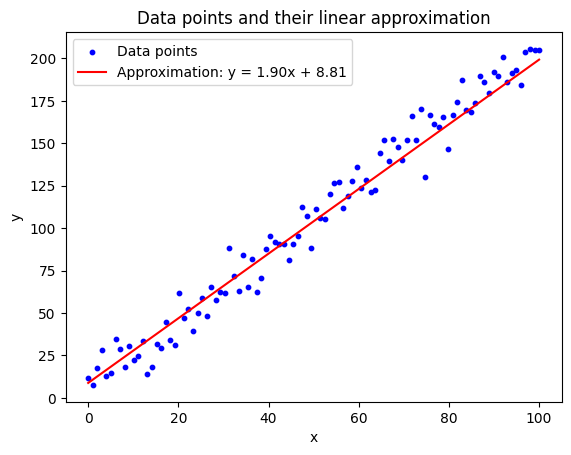

In [3]:
import numpy as np
from scipy.optimize import linprog
import time
import matplotlib.pyplot as plt

# Generate 1000 sample data points
np.random.seed(42)
x = np.linspace(0, 100, 100)
y = 2 * x + 7 + np.random.normal(0, 10, x.size)  # A line with some noise

# Number of data points
n = len(x)

# Coefficients for the linear programming problem
c = np.array([0, 0, 1])  # Coefficients for a, b, t respectively

# Inequality constraints
A_ub = []
b_ub = []

for i in range(n):
    A_ub.append([-x[i], -1, -1])  # -ax_i - b - t >= -y_i -> y_i - ax_i - b <= t
    b_ub.append(-y[i])
    
    A_ub.append([x[i], 1, -1])    # ax_i + b - t >= y_i -> ax_i + b - y_i <= t
    b_ub.append(y[i])

A_ub = np.array(A_ub)
b_ub = np.array(b_ub)

# Bounds for the variables
x_bounds = [(None, None), (None, None), (0, None)]  # No bounds on a and b, t >= 0

# Measure time taken to solve the problem
start_time = time.time()

# Solve the linear programming problem
result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=x_bounds, method='highs')

end_time = time.time()

# Check if the optimization was successful
if result.success:
    # Extract the solution
    a, b, t = result.x
    print(f"Optimal a: {a}")
    print(f"Optimal b: {b}")
    print(f"Minimum error t: {t}")
else:
    print("Optimization failed.")
    print(f"Status: {result.status}")
    print(f"Message: {result.message}")

print(f"Time taken: {end_time - start_time} seconds")

# Plot the data points and the approximating line
plt.scatter(x, y, color='blue', label='Data points', s=10)
plt.plot(x, a * x + b, color='red', label=f'Approximation: y = {a:.2f}x + {b:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points and their linear approximation')
plt.legend()
plt.show()


Degree p

Optimal polynomial coefficients: [ 2.61017187e+01 -7.39291888e+00  1.27255724e+00 -7.24427741e-02
  2.04805952e-03 -3.02607189e-05  2.23518363e-07 -6.51025539e-10]
Minimum error t: 20.474963558227046


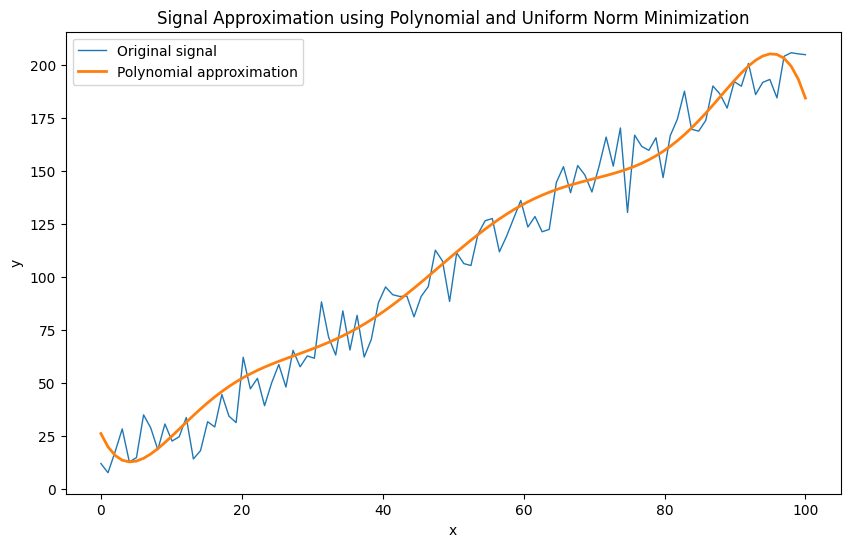

-7.3929188825986385


In [4]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt



""" # Define the signal function
def f(x):
    return np.sin(x) + np.random.normal(0, 0.1, x.size)  # Sine wave with some noise

# Generate sample data points
np.random.seed(42)
x = np.linspace(0, 2 * np.pi, 5000)
y = f(x) """


np.random.seed(42)
x = np.linspace(0, 100, 100)
y = 2 * x + 7 + np.random.normal(0, 10, x.size)  # A line with some noise

# Degree of the polynomial 
degree = 7

# Number of data points
n = len(x)

# Coefficients for the linear programming problem
# There will be degree + 1 coefficients for the polynomial plus one for the error term
c = np.zeros(degree + 2)
c[-1] = 1  # Coefficient for the error term

# Inequality constraints
A_ub = []
b_ub = []


# Look at photo for calculations and rearrangements!
for i in range(n):
    row_pos = []
    row_neg = []
    for j in range(degree + 1):
        row_pos.append(x[i]**j)
        row_neg.append(-x[i]**j)
    
    row_pos.append(-1)  # -t term
    row_neg.append(-1)  # -t term
    
    A_ub.append(row_pos)  # f(x_i) - g(x_i) <= t
    b_ub.append(y[i])
    
    A_ub.append(row_neg)  # g(x_i) - f(x_i) <= t
    b_ub.append(-y[i])

A_ub = np.array(A_ub)
b_ub = np.array(b_ub)

# Bounds for the variables
bounds = [(None, None)] * (degree + 1) + [(0, None)]  # No bounds on polynomial coefficients, t >= 0

# Solve the linear programming problem
result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

# Check if the optimization was successful
if result.success:
    # Extract the solution
    coeffs = result.x[:-1]  # The polynomial coefficients
    min_error = result.x[-1]  # The minimum error t
    print(f"Optimal polynomial coefficients: {coeffs}")
    print(f"Minimum error t: {min_error}")
else:
    print("Optimization failed.")
    print(f"Status: {result.status}")
    print(f"Message: {result.message}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original signal', linewidth=1)
plt.plot(x, np.polyval(coeffs[::-1], x), label='Polynomial approximation', linewidth=2)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Signal Approximation using Polynomial and Uniform Norm Minimization')
plt.show()


print(result.x[1])

Check if I can extend a list inside a function

In [5]:
import numpy as np

# Define the list of tuples
best_approxes = [
    (1, 2, 3, np.array([1.1, 2.2, 235234534252345, 3.3])),
    (4, 5, 6, np.array([4.4, 5.5, 6.6, 7.35325]))
]

# Initialize the serialized list
serialized = []

# Loop through each tuple and serialize the elements
for tupel in best_approxes:
    serialized.append(np.int32(tupel[0]))
    serialized.append(np.int32(tupel[1]))
    serialized.append(np.int32(tupel[2]))
    serialized.extend(tupel[3].astype(np.float64).tolist())

# Print the serialized list
print(serialized)

[1, 2, 3, 1.1, 2.2, 235234534252345.0, 3.3, 4, 5, 6, 4.4, 5.5, 6.6, 7.35325]


In [6]:
np.array([5.9858])

array([5.9858])

In [7]:
import numpy as np

def overwrite_list_with_array(lst):
    array = np.array([10, 20, 30])
    
    # Clear the list
    lst.clear()
    
    # Extend the list with elements from the numpy array
    lst.extend(array.tolist())
    
    #list = array.tolist()

# Create a list
my_list = [1, 2, 3, 4, 5]

# Create a numpy array


# Print the original list
print("Original list:", my_list)

# Call the function with the list and the numpy array
overwrite_list_with_array(my_list)

# Print the modified list
print("Modified list:", my_list)

Original list: [1, 2, 3, 4, 5]
Modified list: [10, 20, 30]


In [8]:

data_path = "/home/sim/Desktop/TS Extrinsic Regression/data/IEEEPPG_TEST.ts"
dataset_array = load_dataset(data_path)
dataset_id = os.path.basename(data_path).split('_')[0]

1351it [00:02, 651.58it/s]
100%|██████████| 1328/1328 [00:01<00:00, 1214.91it/s]


In [9]:
# -> 5 Seconds for block of size 1000 on my laptop -> IEEEPPG would need 8h for everything only to compress
a = ppa_compress(dataset_array[0,:1000,0],0.6, 5)
a

[0,
 13,
 2,
 -0.07400434968783966,
 0.0505986699402354,
 -0.001581208435632429,
 13,
 20,
 0,
 -0.9084080411710256,
 20,
 34,
 1,
 0.4666108144548585,
 0.002529933497011738,
 34,
 46,
 1,
 -0.4348044905304268,
 0.018215521178484684,
 46,
 49,
 0,
 0.5640132540898106,
 49,
 57,
 0,
 1.6721241257809556,
 57,
 78,
 4,
 1.5701388368650875,
 -0.3567316227897439,
 0.06943915032108122,
 -0.0036095874696822896,
 4.071741707853488e-05,
 78,
 88,
 0,
 1.0042216825698544,
 88,
 92,
 0,
 0.07826602266355534,
 92,
 100,
 0,
 -0.7262528293861799,
 100,
 105,
 0,
 0.5032948501615288,
 105,
 120,
 2,
 -0.036143192145753546,
 0.09740243963495215,
 -0.0018271741922862479,
 120,
 132,
 1,
 -0.8287151360151555,
 0.15938581031173998,
 132,
 140,
 0,
 -0.923587642153096,
 140,
 158,
 3,
 -1.4698364260650292,
 0.16793939499211305,
 -0.04394855903380435,
 0.0027949741490796765,
 158,
 164,
 1,
 1.1636074928815945,
 -0.07589800491035241,
 164,
 169,
 0,
 2.2944877660458447,
 169,
 175,
 0,
 2.962390209256946,

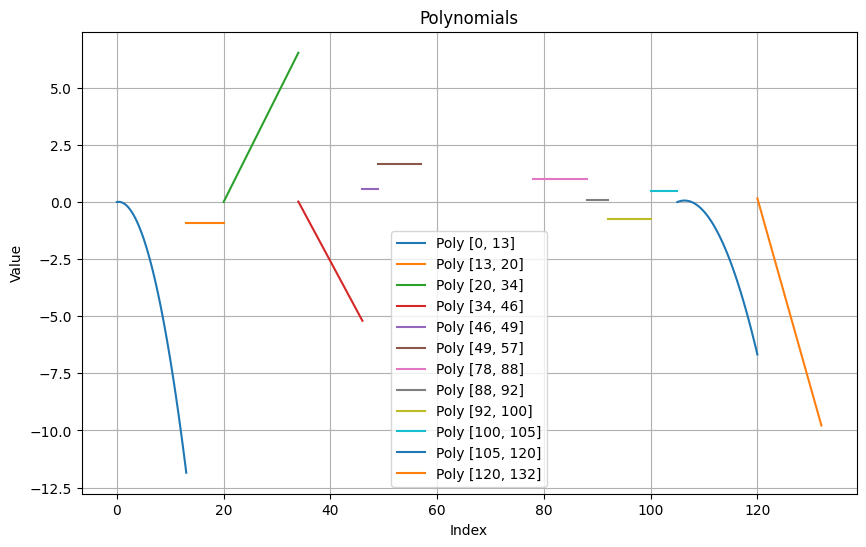

In [10]:

import numpy as np
import matplotlib.pyplot as plt

# Provided list of polynomial functions
polynomial_data = [0,
 13,
 2,
 -0.07400434968783966,
 0.0505986699402354,
 -0.001581208435632429,
 13,
 20,
 0,
 -0.9084080411710256,
 20,
 34,
 1,
 0.4666108144548585,
 0.002529933497011738,
 34,
 46,
 1,
 -0.4348044905304268,
 0.018215521178484684,
 46,
 49,
 0,
 0.5640132540898106,
 49,
 57,
 0,
 1.6721241257809556,
 78,
 88,
 0,
 1.0042216825698544,
 88,
 92,
 0,
 0.07826602266355534,
 92,
 100,
 0,
 -0.7262528293861799,
 100,
 105,
 0,
 0.5032948501615288,
 105,
 120,
 2,
 -0.036143192145753546,
 0.09740243963495215,
 -0.0018271741922862479,
 120,
 132,
 1,
 -0.8287151360151555,
 0.15938581031173998,
]

def decode_polynomial(data):
    polynomials = []
    i = 0
    while i < len(data):
        start_idx = int(data[i])  # Start index of the polynomial
        end_idx = int(data[i+1])  # End index of the polynomial
        degree = int(data[i+2])  # Degree of the polynomial
        coefficients = data[i+3:i+3+degree+1]  # Extract the coefficients
        polynomials.append((start_idx, end_idx, np.poly1d(coefficients)))  # Create polynomial
        i += 3 + degree + 1  # Move to the next polynomial segment
    return polynomials

# Decode the polynomial data
polynomials = decode_polynomial(polynomial_data)

# Generate x values and plot all polynomials
x_values = np.linspace(0, 31, 400)  # Create a common x-axis range for plotting

plt.figure(figsize=(10, 6))

for start_idx, end_idx, poly in polynomials:
    x_range = np.linspace(start_idx, end_idx, 100)  # Create x values for this polynomial's range
    y_values = poly(np.linspace(0,end_idx - start_idx, 100))  # Calculate y values using the polynomial
    plt.plot(x_range, y_values, label=f'Poly [{start_idx}, {end_idx}]')  # Plot the polynomial

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Polynomials')
plt.legend()
plt.grid(True)
plt.show()
